In [120]:
# https://platform.olimpiada-ai.ro/problems/22

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [121]:
train = pd.read_csv("/kaggle/input/diagnosing-diabetes/train.csv")
test = pd.read_csv("/kaggle/input/diagnosing-diabetes/test.csv")

len(train), len(test)

(537, 231)

In [122]:
train.head(3)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,target,SampleID
0,7,184,84,33,0,35.5,0.355,41,1,210
1,6,85,78,0,0,31.2,0.382,42,0,177
2,2,106,64,35,119,30.5,1.400,34,0,148


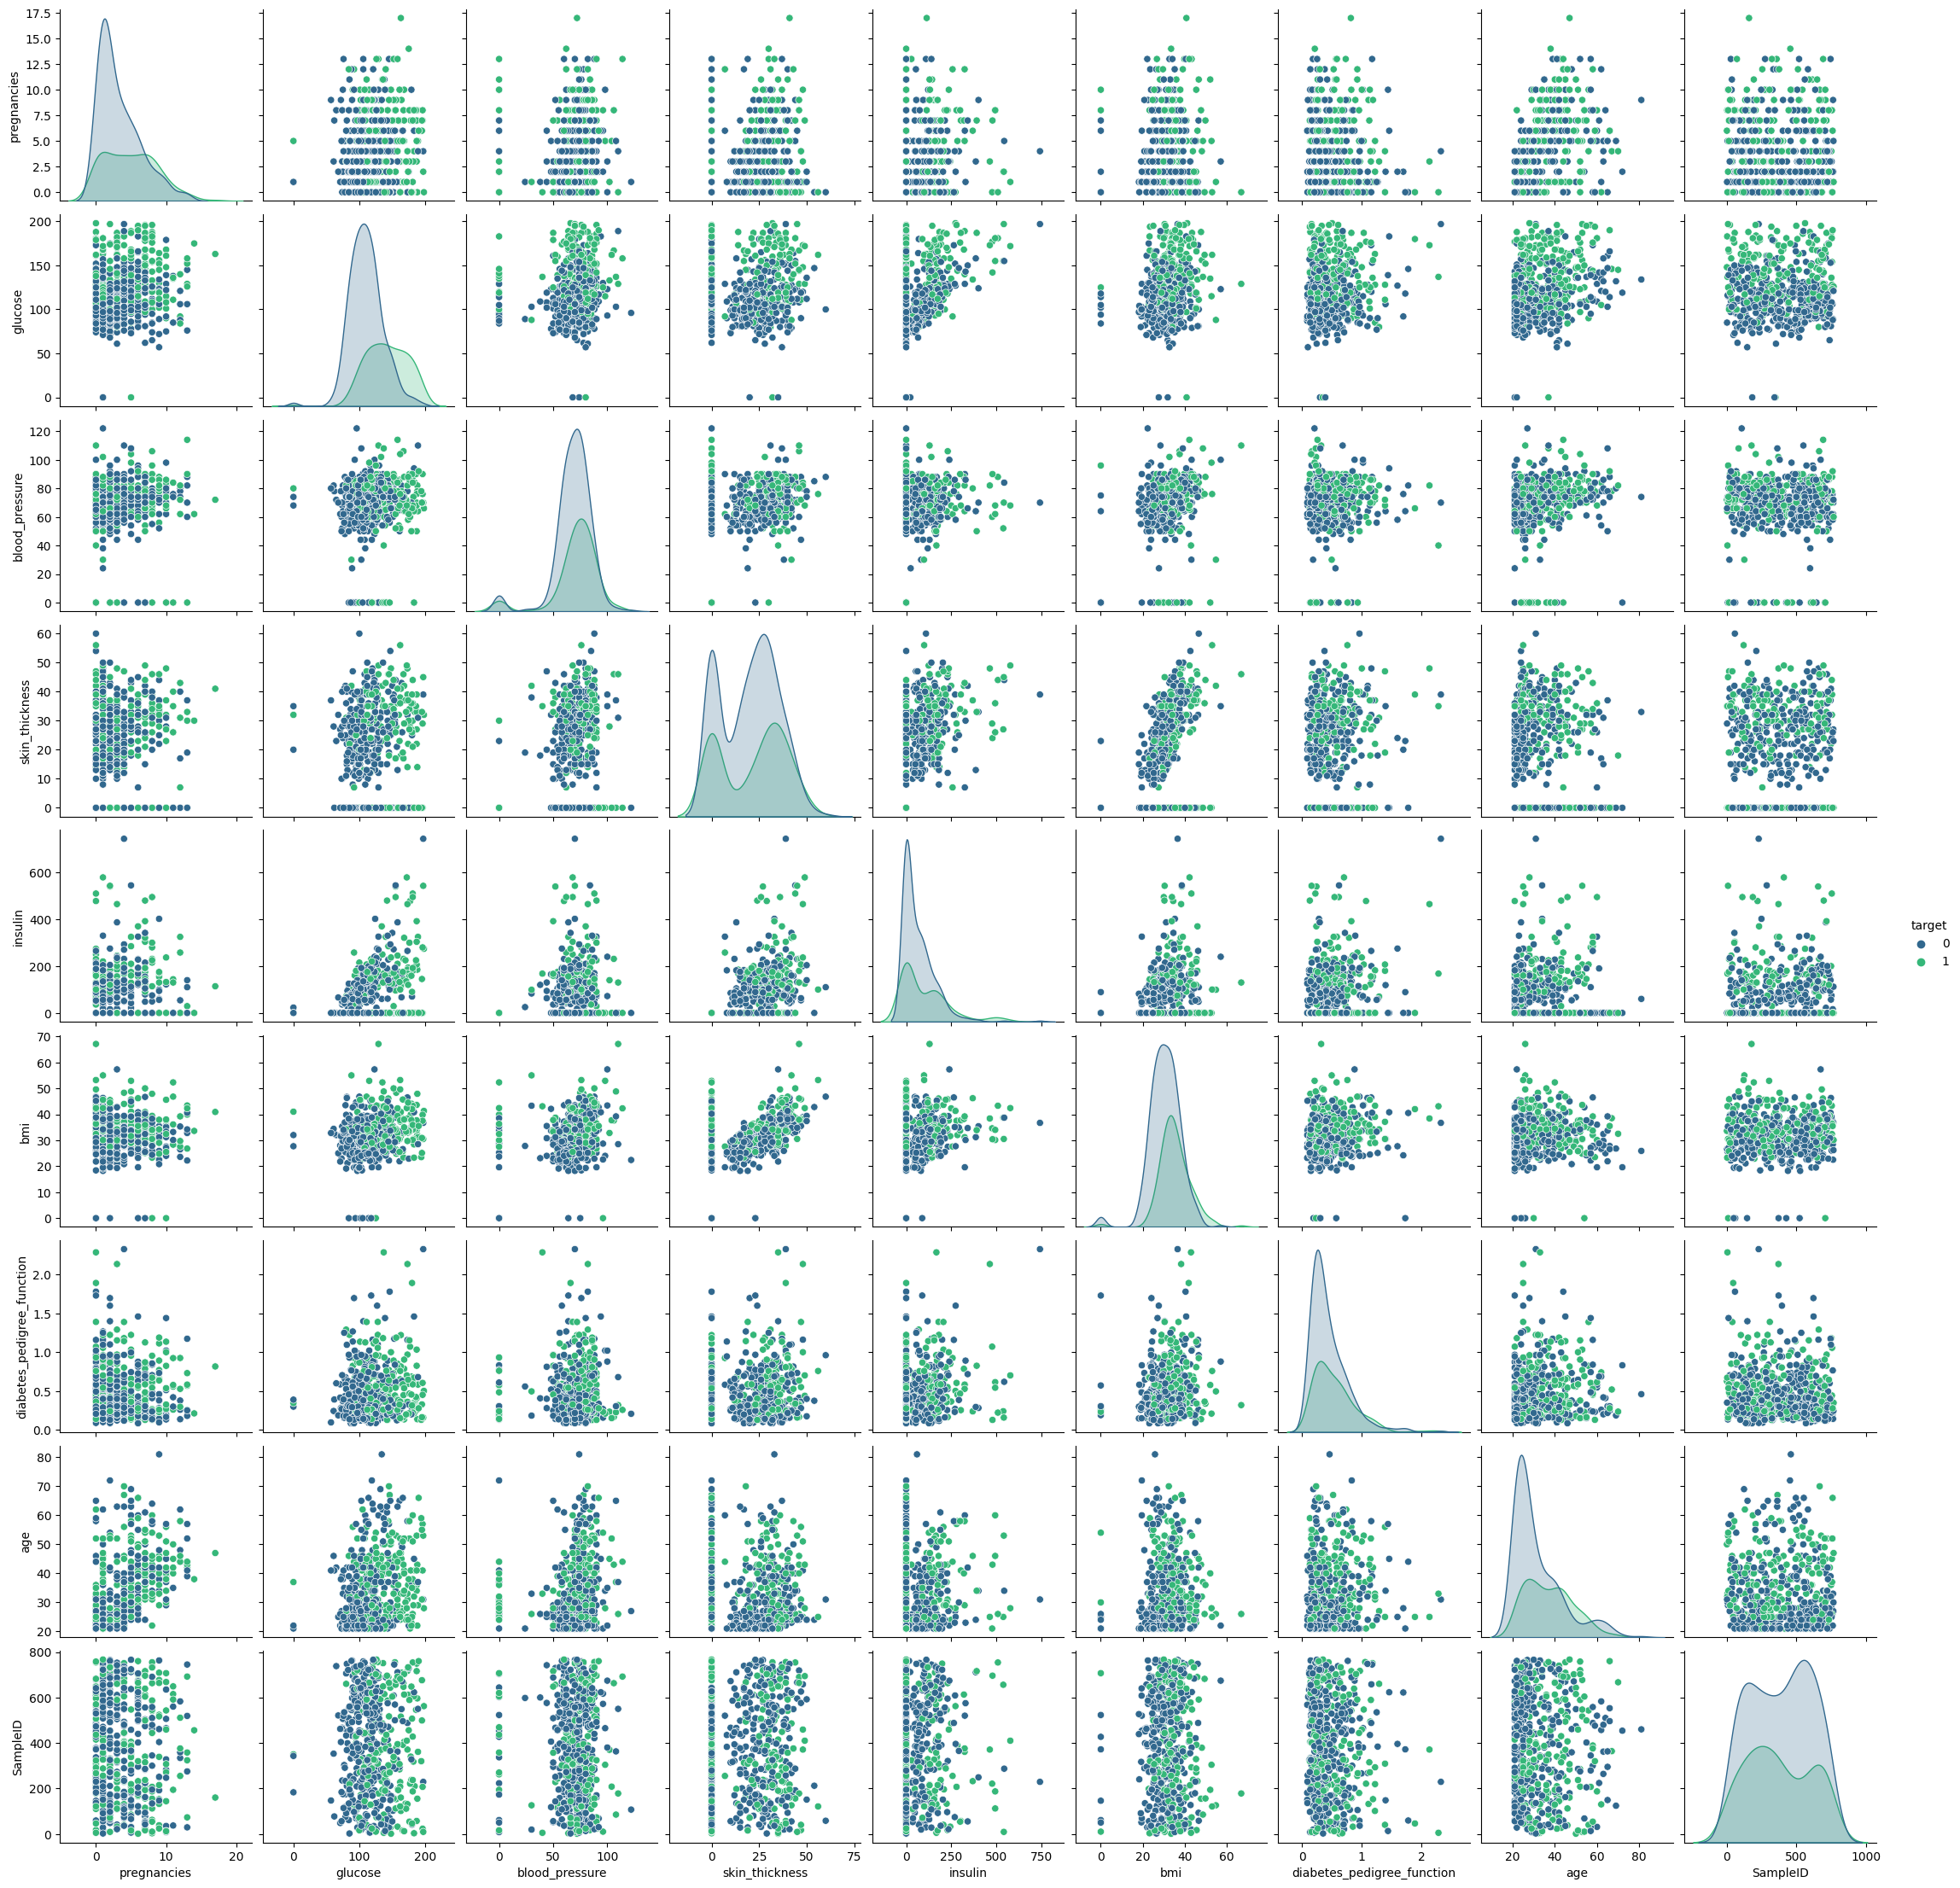

In [123]:
sns.pairplot(train, hue='target', palette='viridis')
warnings.resetwarnings()
plt.show()

In [124]:
def process_df(df):
    cols = [c for c in df.columns if c not in ['target', 'SampleID']]
    for c in cols:
        df[f'{c}_sqrt'] = np.sqrt(df[c])
        df[f'{c}_log'] = np.log10(df[c]*100+1)
    return df

train = process_df(train)
test = process_df(test)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = [c for c in train.columns if c not in ['target', 'SampleID']]

X, y = train[features].values, train['target'].values
X_test = test[features].values

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [126]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=50, random_state=42)

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=50, random_state=42)

In [127]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_valid).flatten()

score = f1_score(y_valid, y_pred)

print(f"Score: {score:.5f}")

Score: 0.73973


In [128]:
y_pred = model.predict(X_test).flatten()

subm = pd.DataFrame({
    'SampleID': test['SampleID'],
    'label': y_pred
})

subm.head()

,SampleID,label
0,731,0
1,199,0
2,25,1
3,418,1
4,388,1


In [129]:
subm.to_csv("submission.csv", index=False)